In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datasets

c:\Users\bhanu\.conda\envs\nilmtk-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
from nilmtk.dataset import DataSet
redd = DataSet('redd.h5')
building = redd.buildings[2]
main_meter = building.elec.mains()
building.elec

MeterGroup(meters=
  ElecMeter(instance=1, building=2, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=2, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=3, building=2, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=4, building=2, dataset='REDD', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=5, building=2, dataset='REDD', appliances=[Appliance(type='electric stove', instance=1)])
  ElecMeter(instance=6, building=2, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=7, building=2, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=8, building=2, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])
  ElecMeter(instance=9, building=2, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=10, building=2, dataset='REDD', appliances=[Appliance(type='dis

In [71]:
dict = {}
appliances = ['fridge', 'dish washer', 'washer dryer', 'sockets', 'light']
for i in appliances:
        dict[i] = building.elec[i].power_series_all_data().to_frame(name=i)

main_df = main_meter.power_series_all_data().to_frame(name='total_power')

dict_dfs = list(dict.values())

# Concatenate all DataFrames into one
df = pd.concat([main_df] + dict_dfs, axis=1)

df = df.dropna()
df.reset_index(inplace=True)
df

Loading data for meter ElecMeterID(instance=1, building=2, dataset='REDD')     

c:\users\bhanu\nilmtk\nilmtk\utils.py:338: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  resampled = series.resample(freq).mean()
c:\users\bhanu\nilmtk\nilmtk\metergroup.py:718: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  index = pd.date_range(
c:\users\bhanu\nilmtk\nilmtk\utils.py:501: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  return fill_method(how(data.resample(rule, **resample_kwargs)))


Loading data for meter ElecMeterID(instance=2, building=2, dataset='REDD')     

c:\users\bhanu\nilmtk\nilmtk\utils.py:501: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  return fill_method(how(data.resample(rule, **resample_kwargs)))



Done loading data all meters for this chunk.


,index,total_power,fridge,dish washer,washer dryer,sockets,light
0,2011-04-18 01:31:40-04:00,38.320000,6.0,1.0,4.0,1.0,8.0
1,2011-04-18 01:31:44-04:00,38.320000,6.0,0.0,5.0,0.0,8.0
2,2011-04-18 01:31:47-04:00,38.330002,6.0,1.0,4.0,1.0,8.0
3,2011-04-18 01:31:50-04:00,38.270000,7.0,0.0,4.0,0.0,8.0
4,2011-04-18 01:32:05-04:00,38.250000,7.0,1.0,4.0,1.0,8.0
...,...,...,...,...,...,...,...
318683,2011-05-22 19:58:54-04:00,263.330017,159.0,0.0,0.0,0.0,9.0
318684,2011-05-22 19:58:57-04:00,263.769989,158.0,0.0,0.0,0.0,8.0
318685,2011-05-22 19:59:01-04:00,263.450012,158.0,0.0,0.0,0.0,9.0
318686,2011-05-22 19:59:04-04:00,263.899994,160.0,0.0,0.0,0.0,9.0


In [72]:
# start_time = 97254 
# end_time = 119582
start_time = 0
end_time = 318687

subset_df = df.iloc[start_time:end_time].reset_index(drop=True)
time = np.arange(start_time, end_time)

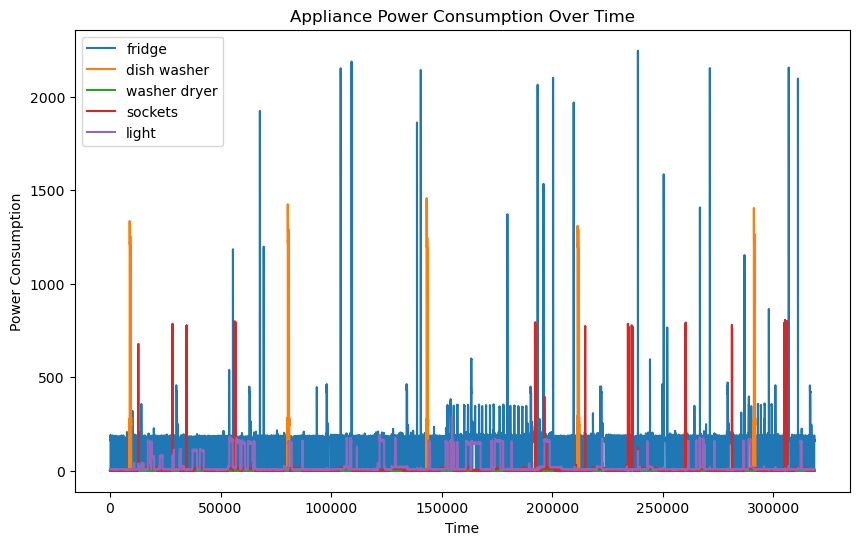

In [73]:
# Plot the data
plt.figure(figsize=(10, 6))
for app in appliances:
    plt.plot(time, subset_df[app].to_numpy(), label=f"{app}")

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Power Consumption')
plt.title('Appliance Power Consumption Over Time')
plt.legend()

# Show the plot
plt.show()

In [74]:
series = pd.Series(subset_df['index'])
# Extract and format the datetime
subset_df['timestamp'] = series.dt.strftime('%Y-%m-%d %H:%M')

# Slice the first 5 characters of the 'timestamp' series
subset_df['timestamp'] = subset_df['timestamp'].str[:20]

result_df = subset_df.groupby('timestamp', as_index=False).mean().drop(columns=['index'])
result_df

,timestamp,total_power,fridge,dish washer,washer dryer,sockets,light
0,2011-04-18 01:31,38.310001,6.250000,0.500000,4.250000,0.500000,8.000000
1,2011-04-18 01:32,38.226925,6.307693,0.230769,4.461538,0.461538,8.000000
2,2011-04-18 01:33,38.311874,6.312500,0.187500,4.562500,0.437500,8.000000
3,2011-04-18 01:34,38.276249,6.500000,0.062500,4.312500,0.375000,8.000000
4,2011-04-18 01:35,38.256874,6.500000,0.000000,4.750000,0.375000,8.000000
...,...,...,...,...,...,...,...
20029,2011-05-22 19:55,267.149323,162.466660,0.066667,0.000000,0.000000,8.866667
20030,2011-05-22 19:56,265.859375,161.437500,0.000000,0.000000,0.000000,8.750000
20031,2011-05-22 19:57,264.590637,160.250000,0.062500,0.000000,0.000000,8.687500
20032,2011-05-22 19:58,264.166870,158.875000,0.000000,0.000000,0.000000,8.562500


In [75]:
# Run the loop
data = []
chunksize = 15
for start in (range(0, len(result_df) - (chunksize), 15)):
    current_chunk = result_df.iloc[start:start+chunksize]
    input_string = current_chunk[['timestamp', 'total_power']].to_csv(index=False, header=False)
    input_string = input_string.replace(',',' ').replace('\n',' ').replace('\r','')
    gpt_string = current_chunk[['timestamp', 'total_power','fridge','dish washer','washer dryer','sockets','light']].to_csv(index=False, header=False)
    gpt_string = gpt_string.replace(',',' ').replace('\n',' ').replace('\r','')
    data.append([ { "from": "human", "value": input_string }, { "from": "gpt", "value": gpt_string } ])
    

In [77]:
new_data = {
    'conversation': data,
}
redd_df = pd.DataFrame(new_data)
len(redd_df)

1335

In [78]:
from datasets import load_dataset

redd_df.to_parquet('building2.parquet', engine='pyarrow')
dataset = load_dataset("philschmid/guanaco-sharegpt-style", split = "train")